**formula**  
$J(x) = \frac{1}{2m}\sum_{i=1}^{m}(\theta.x_i - y_i)^2 + \frac{\lambda}{2m}\sum{\theta^2}$  
$\theta=\theta - \alpha \frac{\delta }{\delta \theta}J(x) + \frac{\lambda}{m}\theta$

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plotData(X, y):
    pos = np.where(y == 1)
    neg = np.where(y == 0)
    plt.scatter(X[pos,0],X[pos,1],c="r",marker="+", label='y=1')
    plt.scatter(X[neg,0],X[neg,1],marker="o",s=10, label='y=0')
    plt.xlabel("Test 1")
    plt.ylabel("Test 2")
    plt.legend()
#     plt.plot(X[pos, 0], X[pos, 1], 'k+', lw = 50, ms=7)
#     plt.plot(X[neg, 0], X[neg, 1], 'ko', color='y', ms=7)
    


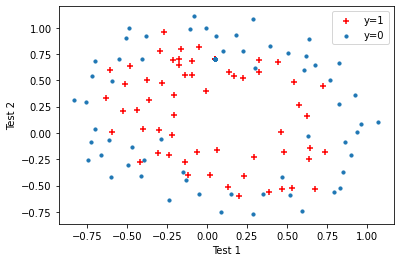

In [2]:
# ======================= Part 1 Plotting =======================
import os
data = np.loadtxt("ex2data2.txt", delimiter=',')
X = data[:, [0, 1]]
y = data[:, 2, np.newaxis]
plotData(X, y)

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [4]:
def costFunctionReg(theta, X, y, _lambda):
    m = len(y)
    k = len(theta)
    I = np.eye(k)
    I[0, 0] = 0
    Z = X.dot(theta)
    h = sigmoid(Z)
    S = np.zeros((k, 1), dtype=float)
    J = -1 / (m) * (np.transpose(y)@(np.log(h)) + np.transpose(1-y)@(np.log(1-h))) + _lambda / (2*m)*np.sum((I@theta)**2, axis=0)

    error = h - y
    for i in range(k):
        S[i] = np.sum(error*X[:,i, np.newaxis], axis=0) + _lambda * (theta[i]*I[i,i])
    grad = 1 / m * S
    
    return J, grad

In [5]:
initial_theta = np.zeros((len(X[0,:]), 1), dtype=float);
costFunctionReg(initial_theta, X, y, 1)

(array([[0.69314718]]),
 array([[1.87880932e-02],
        [7.77711864e-05]]))

In [6]:
# https://www.coursera.org/learn/machine-learning/discussions/weeks/3/threads/poUNvD1-EeakuhJbRt69hQ
def mapFeature(x1, x2, degree):
    """
    take in numpy array of x1 and x2, return all polynomial terms up to the given degree
    """
    
    out = np.ones(x1.shape)[:, np.newaxis]
    for i in range(1, degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j)[:, np.newaxis]
            out= np.hstack((out,terms))
    return out


In [7]:
X_ = mapFeature(X[:, 0], X[:, 1], 6)
initial_theta = np.zeros((len(X_[0, :]), 1))
_lambda = 1
cost, grad = costFunctionReg(initial_theta, X_, y, _lambda)

In [8]:
def gradientDescent(X,y,theta,alpha,num_iters,_lambda):
    J_history = np.zeros((num_iters, 1), dtype=float)
    for i in range(num_iters):
        cost, grad = costFunctionReg(theta,X,y,_lambda)
        theta = theta - (alpha * grad)
        J_history[i] = cost

    return theta , J_history

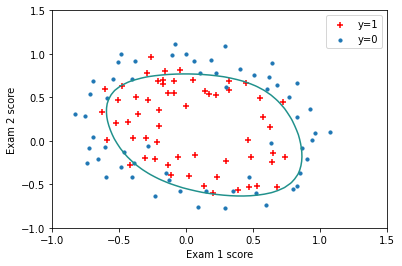

In [9]:
theta , J_history = gradientDescent(X_,y,initial_theta,1,800,0.2)
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))

map_ = mapFeature(u, v, 6)

for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = mapFeature(np.array([u[i]]), np.array([v[j]]), 6) @ theta


pos = (y == 1)
neg = (y == 0)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+", label='y=1')
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="o",s=10, label='y=0')
        
plt.contour(u,v,z,0)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend()

In [10]:
def predict(theta, X):
    '''Predict whether the label
    is 0 or 1 using learned logistic
    regression parameters '''

    Z = X.dot(theta)
    h = sigmoid(Z)

    return h>=0.5

In [11]:
#Compute accuracy on our training set
p = predict(theta, X_)
print('Train Accuracy: {:f}'.format(((y[np.where(p == y)].size / float(y.size)) * 100.0)))

Train Accuracy: 83.050847


Text(0.5, 1.0, 'Cost function using Gradient Descent')

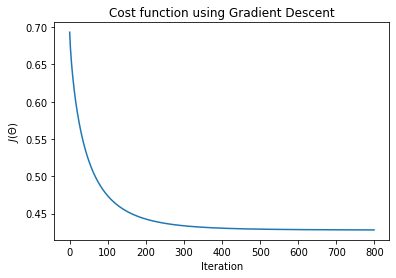

In [12]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")